## 데이터 전처리(Data Preprocessing)
수행하고자 하는 분석에 적합하게 데이터를 가공하는 작업
- 데이터 클리닝 : 결측치 처리, 이상치 확인 및 정제 등
- 데이터 통합 : 다양한 데이터 파일 결합 등
- 데이터 변환 : 스케일링, 요약 등
- 데이터 축소 : 변수 축소, 라벨링 등
- 불균형 데이터 처리 : 언더/오버 샘플링 등
- 데이터 분할 : train, test 데이터 분할 등

#### [이상치 확인 및 정제]

##### 1) 이상치 확인
자료형 등이 다른 관측치는 이상값 존재 여부를 확인할 수 있다. 하지만 관측 형식은 같지만 실제 환경에서 발생하지 않는 이상치의 경우(극단값) 모델 전체에 영향을 미칠 수 있으므로 정제해 주는 것이 좋다.

<b><해석></b> boxplot을 그려보면 Q3의 수염 위에 4개의 이상치를 확인할 수 있다. 이상치 위치와 값을 확인해보자.

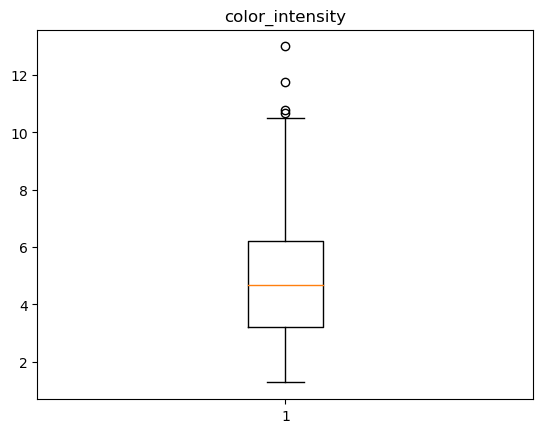

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns = wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0', 1:'class_1', 2:'class_2'})

plt.boxplot(wine['color_intensity'], whis=1.5)
plt.title('color_intensity')
plt.show()

In [4]:
import numpy as np
def outliers_iqr(dt,col):
    q1, q3 = np.percentile(dt[col], [25,75])
    iqr = q3 - q1
    lower_whis = q1 - (iqr*1.5)
    upper_whis = q3 + (iqr*1.5)
    outliers = dt[(dt[col] > upper_whis) | (dt[col] < lower_whis)]
    return outliers[[col]]

outliers = outliers_iqr(wine, 'color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


##### 2) 이상치 정제
이상치 정제 방법은 이상치를 가진 행을 삭제하거나, 이상치를 적절한 값으로 정제하는 것이 있다.

- 이상치 제거

In [5]:
drop_outliers = wine.drop(index=outliers.index)

# 이상치 삭제 전후 데이터 shape
print('Original : ', wine.shape)
print('Drop_outliers : ', drop_outliers.shape)

Original :  (178, 14)
Drop_outliers :  (174, 14)


- 이상치 대체

In [17]:
# wine['color_intensity'].mean()
wine.loc[outliers.index, 'color_intensity']

151   NaN
158   NaN
159   NaN
166   NaN
Name: color_intensity, dtype: float64

In [24]:
# 이상치를 NaN으로 변경
wine.loc[outliers.index, 'color_intensity'] = np.NaN
wine.loc[outliers.index, 'color_intensity']

151    NaN
158    NaN
159    NaN
166    NaN
Name: color_intensity, dtype: object

In [29]:
# 이상치를 평균값으로 변경
# 수치로 변경할 때는 이상치를 NaN로 만든 후 수행
wine['color_intensity'].fillna(wine['color_intensity'].mean(), inplace=True)
wine.loc[outliers.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

##### 3) 범주형 변수 처리
범주형 변수(Categorical Data)는 질적변수라고도 하며 명목형변수와 순서형변수가 여기에 포함된다.

- 더미변수화

In [30]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

# pd.get_dummies(data, columns=['범주형1','범주형2'])
iris_dummy = pd.get_dummies(iris, columns=['Class'])
iris_dummy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_Setosa,Class_Versicolour,Class_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


##### 4) 데이터 분할 (7:3 / 6:2:2)

In [38]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'),
                                                    iris['Class'], test_size=0.3, random_state=123)

print('X_train: ', X_train.shape, 'X_test: ',X_test.shape)
print('y_train: ', y_train.shape, 'y_test: ',y_test.shape)

X_train:  (105, 4) X_test:  (45, 4)
y_train:  (105,) y_test:  (45,)


In [39]:
print(iris['Class'].value_counts())
print('\n')
print(y_train.value_counts())

Setosa         50
Versicolour    50
Virginica      50
Name: Class, dtype: int64


Versicolour    40
Virginica      33
Setosa         32
Name: Class, dtype: int64


무작위임의추출을 수행하면 각 범주의 개수 비율이 차이가 날 수 있다. 크게 차이나지 않는 경우는 문제없지만, 무작위 임의추출 결과가 원본을 충분히 반영하지 못한다면 분석 성능에 큰 악영향을 미칠 수 있다.

-> stratify : 범주 개수 차이가 크게 나지 않도록 층화임의추출을 수행할 수 있다.

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'),
                                                    iris['Class'], test_size=0.3, random_state=123, stratify=iris['Class'])

y_train.value_counts()

Versicolour    35
Setosa         35
Virginica      35
Name: Class, dtype: int64

##### 5) 데이터 스케일링
- 표준화(Standardization) : 각 컬럼의 평균을 0, 분산을 1인 정규분포로 만드는 방법

In [48]:
# standard scaler
# 최소/최대값 크기를 제한하지 않아 이상치에 매우 민감하므로 이상치 확인 및 정제 후 사용해야 함
# 회귀보단 분류분석에서 유용
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

std.fit(X_train)
X_train_scale = std.transform(X_train)
X_test_scale = std.transform(X_test)

print('Train scaled(%.2f, %.2f, %.2f, %.2f)'
      %(X_train_scale.min(), X_train_scale.max(), X_train_scale.mean(), X_train_scale.std()))
print('Train scaled(%.2f, %.2f, %.2f, %.2f)'
      %(X_test_scale.min(), X_test_scale.max(), X_test_scale.mean(), X_test_scale.std()))

Train scaled(-2.37, 3.09, -0.00, 1.00)
Train scaled(-1.91, 2.64, 0.08, 1.08)


- 정규화(Normalization) : 각 컬럼들 값이 특정 범위(주로 0~1) 안에 들어가도록 하는 방법

In [49]:
# min-max Scaler
# 마찬가지로 이상치에 매우 민감하므로 이상치 확인 및 정제 후 사용해야 함
# 분류보단 회귀에 유용
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

mm.fit(X_train)
X_train_scale = mm.transform(X_train)
X_test_scale = mm.transform(X_test)

print('Train scaled(%.2f, %.2f, %.2f, %.2f)'
      %(X_train_scale.min(), X_train_scale.max(), X_train_scale.mean(), X_train_scale.std()))
print('Train scaled(%.2f, %.2f, %.2f, %.2f)'
      %(X_test_scale.min(), X_test_scale.max(), X_test_scale.mean(), X_test_scale.std()))

Train scaled(0.00, 1.00, 0.44, 0.26)
Train scaled(-0.02, 1.00, 0.46, 0.28)


In [50]:
# Max Abs Scaler
# -1과 1사이에 표현되며 데이터가 양수인 경우 min-max와 동일함
# 이상치에 매우 민감하며, 분류보단 회귀에 유용
from sklearn.preprocessing import MaxAbsScaler
mabs = MinMaxScaler()

mabs.fit(X_train)
X_train_scale = mabs.transform(X_train)
X_test_scale = mabs.transform(X_test)

print('Train scaled(%.2f, %.2f, %.2f, %.2f)'
      %(X_train_scale.min(), X_train_scale.max(), X_train_scale.mean(), X_train_scale.std()))
print('Train scaled(%.2f, %.2f, %.2f, %.2f)'
      %(X_test_scale.min(), X_test_scale.max(), X_test_scale.mean(), X_test_scale.std()))

Train scaled(0.00, 1.00, 0.44, 0.26)
Train scaled(-0.02, 1.00, 0.46, 0.28)


In [51]:
# Robust Scaler
# 평균과 분산대신 중앙값과 사분위값을 활용, 
# 중앙값을 0으로 설정하고 IQR을 사용하여 이상치 영향을 최소화한다.
from sklearn.preprocessing import RobustScaler
rbt = RobustScaler()    # RobustScaler(quantile_range=(0.25, 0.75))

rbt.fit(X_train)
X_train_scale = rbt.transform(X_train)
X_test_scale = rbt.transform(X_test)

print('Train scaled(%.2f, %.2f, %.2f, %.2f)'
      %(X_train_scale.min(), X_train_scale.max(), X_train_scale.mean(), X_train_scale.std()))
print('Train scaled(%.2f, %.2f, %.2f, %.2f)'
      %(X_test_scale.min(), X_test_scale.max(), X_test_scale.mean(), X_test_scale.std()))

Train scaled(-1.67, 2.33, -0.01, 0.60)
Train scaled(-1.33, 2.00, 0.04, 0.64)


- 원본 스케일로 변경

In [54]:
# sclaer.inverse_transform()
pd.DataFrame(X_train_scale).head(3)

,0,1,2,3
0,-16.826923,-12.019231,-16.826923,-0.3
1,-7.211538,10.817308,-69.711538,-0.9
2,-2.403846,0.000000,-2.403846,0.0


In [55]:
X_original = rbt.inverse_transform(X_train_scale)
pd.DataFrame(X_original).head(3)

,0,1,2,3
0,5.0,2.0,3.5,1.0
1,5.4,3.9,1.3,0.4
2,5.6,3.0,4.1,1.3


##### 6) 차원축소
데이터 분석 수행 시 설명변수가 너무 많은 경우 오히려 알고리즘 성능이 저하된다. 차원이 늘어남에 따라 데이터간 거리가 멀어지거나 전체 영역에서 설명 데이터의 비율은 줄어드는 현상이 발생한다.
- 설명변수 선택 : 가장 간단하고 해석이 쉬운 방법으로 유용하지 않거나 상관관계가 높은 컬럼은 제거한다. (다중공선성 비교)

- 주성분 분석(PCA; Principle Component Analysis) : 차원축소에서 가장 많이 사용되는 차원추출 방법이다.(차원추출 : 기존 컬럼을 새롭게 해석하여 저차워의 초평면에 투영하는 것) // PCA는 여러변수간 존재하는 상관관계를 이용하여 데이터를 축에 사영했을 때 분산이 가장 높은 축을 찾아 그 축을 새로운 주성분으로 결정하는 방법이다.

In [59]:
## PCA를 위한 전처리
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

# 1) 수치형 데이터만 추출
x = iris.drop(columns='Class')

# 2) 수치형 변수 정규화
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

pd.DataFrame(x).head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [61]:
## 주성분 추출
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_fit = pca.fit(x)

print('고유값: ', pca.singular_values_)
print('분산 설명력: ', pca.explained_variance_ratio_)

고유값:  [20.92306556 11.7091661   4.69185798  1.76273239]
분산 설명력:  [0.72962445 0.22850762 0.03668922 0.00517871]


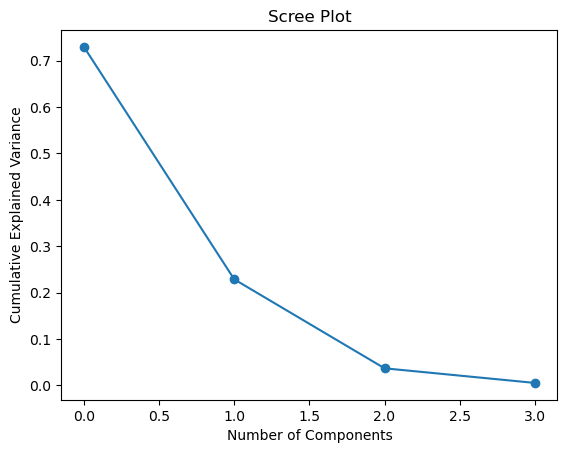

In [62]:
## Scree Plot : 사용할 주성분 개수 정하기
# 주성분 개수가 증가할수록 scree plot의 기울기(분산의 변화정도)는 감소한다.
# 보통 기울기가 급격히 감소하는 지점의 직전까지를 주성분으로 선택한다.
import matplotlib.pyplot as plt

plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.show()

In [63]:
# 주성분 수 정하고 원하는 개수의 주성분을 가진 데이터프레임 생성
pca = PCA(n_components=2)
pca_n = pca.fit_transform(x)

pca_iris = pd.DataFrame(data=pca_n, columns=['pca1','pca2'])
pca_iris.head()

,pca1,pca2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


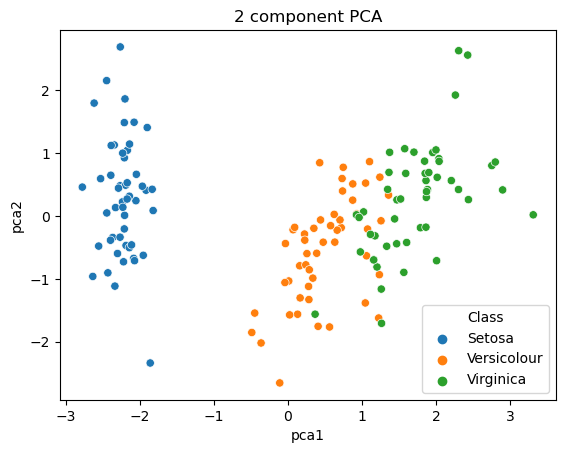

In [65]:
# 주성분 산포도 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('2 component PCA')
sns.scatterplot(x='pca1', y='pca2', hue=iris['Class'], data=pca_iris)
plt.show()

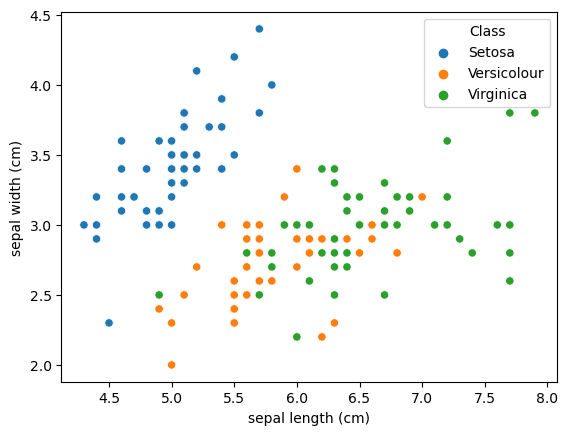

In [67]:
# 아래 원본보다 주성분 데이터프레임이 종속변수를 더 잘 설명하는 산포도를 그린 것을 확인할 수 있다.
sns.scatterplot(x=iris['sepal length (cm)'], y=iris['sepal width (cm)'], data=iris, hue=iris['Class'])
plt.show()

##### 7) 데이터 불균형 문제 처리
일반적으로 이상을 정확히 분류하는 것이 더 중요하다. 무작정 정확도를 높이기보다는 정확도를 다소 포기하더라도 최대한 손실없이 이상을 가려내는 것이 중요하다.

<b>[ 오차행렬 ]</b>

이진분류 모델 성능평가 기법 중 하나로, 클래스의 값이 True/False만을 가질 때 4분면 행렬에 실제 클래스 값과 예측 클래스 값이 어떻게 매핑되는지 표현한 것이다. 오차행렬의 값으로도 정확도, 정밀도, 재현율 등 다양한 이진분류 결과 지표를 생성할 수 있으며, 이진분류에서는 이 평가지표를 다각적으로 활용하여 분류 성능을 평가한다.

<img src="https://velog.velcdn.com/images%2Fsset2323%2Fpost%2F2fb704cf-8556-40fc-87a2-75b8feb32986%2Fimage.png" width='35%' height='35%'>

- TN(True Negative) : 음성을 음성이라고 예측
- FP(False Positive) : 음성을 양성이라고 예측
- FN(False Negative) : 양성을 음성이라고 예측
- TP(True Positive) : 양성을 양성이라고 예측

- 언더샘플링(Under Sampling)

다수의 레이블을 가진 데이터를 샘플링하여 소수의 데이터셋 레이블의 수 수준으로 감소시키는 기법이다. 이 기법은 데이터 불균형으로 인한 문제는 피할 수 있지만 전체 데이터 수가 급격하게 줄어들어 오히려 학습 성능을 떨어뜨리는 결과를 초래할 수 있다.

In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# 95:1 불균형 데이터 생성
x, y = make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)
print(Counter(y))

Counter({0: 1900, 1: 100})


In [37]:
# 랜덤 언더샘플링 : 다수를 차지하는 레이블에서 무작위로 데이터를 제거
# sampling_strategy='majority' : 다수레이블을 데이터 샘플링하여 소수레이블 데이터 수와 동일하게 줄임
undersample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))

'''
0번 레이블이 1번 레이블 수에 맞춰서 100개로 줄어든 것을 확인할 수 있다.
'''

Counter({0: 100, 1: 100})


'\n0번 레이블이 1번 레이블 수에 맞춰서 100개로 줄어든 것을 확인할 수 있다.\n'

In [38]:
# 파라미터를 0~1 사이 숫자로 지정하면 소수레이블 데이터 수와 다수레이블 데이터 수가 해당 비율이 되도록 조장함
undersample = RandomUnderSampler(sampling_strategy=0.5)
x_under2, y_under2 = undersample.fit_resample(x, y)
print(Counter(y_under2))

Counter({0: 200, 1: 100})


- 오버샘플링(Over Sampling)

소수레이블을 지닌 데이터셋을 다수레이블이 지닌 데이터셋 수만큼 증식시켜 학습에 사용하기 위한 충분한 양과 비율의 데이터를 확보하는 기법이다. 데이터의 손실이 없어 일반적으로 언더샘플링보다 성능이 유리하여 주로 사용된다.

In [39]:
# 랜덤 오버샘플링 : 소ㅜ레이블 데이터셋을 단순 복제하여 다수레이블과 비율을 맞추는 방법
# 데이터를 단순 복제하기 때문에 분포는 변하지 않지만 그 수가 늘어나 같은 비율로 가중치를 받을 수 있다.
# 오버피팅 위험성이 있지만 불균형 문제를 처리하지 않는 것 보다는 유효하기 때문에 종종 사용된다.
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.5)
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({0: 1900, 1: 950})
Counter({0: 1900, 1: 1900})


- SMOTE (Synthetic Minority Over-sampling Technique)

소수레이블을 지닌 데이터셋 관측값에 대한 K개 최근접이웃을 찾고, 관측값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방법으로 <b>샘플 수를 늘리는</b> 방법이다.

In [40]:
from imblearn.over_sampling import SMOTE

smote_sample = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote_sample.fit_resample(x, y)
print(Counter(y_sm))

Counter({0: 1900, 1: 1900})


In [57]:
x[2]

array([-0.34934587, -0.97845475,  0.42326069, -0.22952232,  0.29845071,
       -1.11370312])